In [157]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importowanie csv do ramki danych
drugsDeaths = pd.read_csv('drug_deaths.csv')
drugsDeaths.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [158]:
drugsDeaths.drop(['Unnamed: 0', 'ID', 'Date', 'DateType', 'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo'], axis=1, inplace = True)
drugsDeaths

,Age,Sex,Race
0,NaN,NaN,NaN
1,48.0,Male,Black
2,30.0,Female,White
3,23.0,Male,White
4,22.0,Male,"Asian, Other"
...,...,...,...
5100,43.0,Male,White
5101,21.0,Male,White
5102,30.0,Male,White
5103,33.0,Male,White


In [159]:
if drugsDeaths.isnull().values.any():
    drugsDeaths = drugsDeaths.dropna().reset_index(drop=True)


drugsDeaths = drugsDeaths[drugsDeaths.Sex != 'Unknown']
drugsDeaths = drugsDeaths[(drugsDeaths.Race == 'Black') | (drugsDeaths.Race == 'White') | (drugsDeaths.Race == 'Asian')]
drugsDeaths.reset_index(drop=True, inplace=True)
drugsDeaths

,Age,Sex,Race
0,48.0,Male,Black
1,30.0,Female,White
2,23.0,Male,White
3,23.0,Male,White
4,21.0,Female,White
...,...,...,...
4429,43.0,Male,White
4430,21.0,Male,White
4431,30.0,Male,White
4432,33.0,Male,White


In [160]:
drugsDeaths['Sex'].replace({'Male' : 1, 'Female': 2}, inplace = True)
drugsDeaths['Race'].replace({'Black': 1, 'White': 2, 'Asian': 3}, inplace = True)

In [161]:
drugsDeaths.describe()

,Age,Sex,Race
count,4434.000000,4434.000000,4434.000000
mean,41.942490,1.270862,1.902346
std,12.420088,0.444455,0.296880
min,14.000000,1.000000,1.000000
25%,31.000000,1.000000,2.000000
50%,42.000000,1.000000,2.000000
75%,52.000000,2.000000,2.000000
max,81.000000,2.000000,2.000000


In [162]:
drugsDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     4434 non-null   float64
 1   Sex     4434 non-null   int64  
 2   Race    4434 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 104.0 KB


<AxesSubplot:>

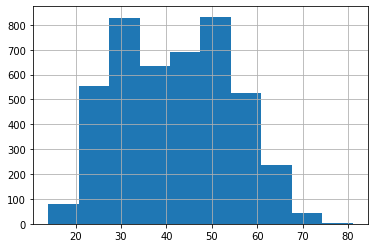

In [163]:
drugsDeaths['Age'].hist()

<AxesSubplot:>

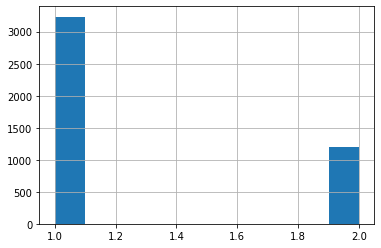

In [164]:
drugsDeaths['Sex'].hist()

<AxesSubplot:>

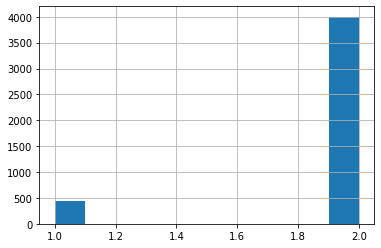

In [165]:
drugsDeaths['Race'].hist()

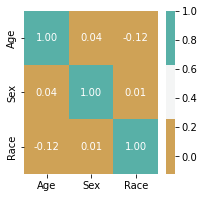

In [166]:
correlations = drugsDeaths.corr()
fig, ax = plt.subplots(figsize=(3, 3))

colormap = sns.color_palette("BrBG", 3)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(drugsDeaths.columns)

plt.show()

In [169]:
X = drugsDeaths.drop('Sex', axis = 1).to_numpy()
X

array([[48.,  1.],
       [30.,  2.],
       [23.,  2.],
       ...,
       [30.,  2.],
       [33.,  2.],
       [33.,  2.]])

In [170]:
y = drugsDeaths.loc[:, 'Sex'].to_numpy()
y

array([1, 2, 1, ..., 1, 1, 1])

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [172]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [173]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [1.0, 0.7373167981961668, 0.8487994808565866, 0.7373167981961668]


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [1.0, 0.7373167981961668, 0.8487994808565866, 0.7373167981961668]


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.981651376146789, 0.7353951890034365, 0.8408644400785854, 0.7260428410372041]


<AxesSubplot:>

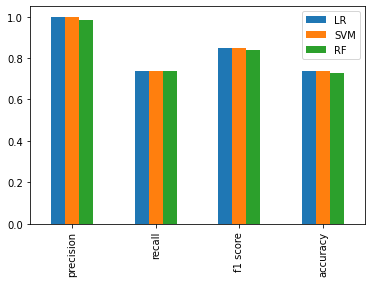

In [176]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [177]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [1.0, 0.7373167981961668, 0.8487994808565866, 0.7373167981961668]


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.9954128440366973, 0.7372593431483578, 0.8471047495120365, 0.7350620067643743]
SVM kernel='sigmoid' [0.7400611620795107, 0.7366818873668188, 0.738367658276125, 0.6133032694475761]
SVM degree=4 [1.0, 0.7373167981961668, 0.8487994808565866, 0.7373167981961668]


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
import pickle 
with open('drugs_overdose_model.pickle', 'wb') as handle:
    pickle.dump(accuracy, handle)